<a href="https://colab.research.google.com/github/jeevanswaroopdasari/Cryptocurrency-Prediction-using-ARIMA-and-LSTM/blob/main/Cascaded_LSTM_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cryptocurrency Prediction And Forecasting Using Stacked LSTM / LSTM

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Input Data for Cascaded Model
file_path = '/content/drive/MyDrive/CS725_Project/data.csv'
df=pd.read_csv(file_path)


In [ ]:
df.head()

,Unnamed: 0,close
0,10,-4.292589
1,11,-12.354187
2,12,-14.385909
3,13,-23.309895
4,14,-30.198339


In [ ]:
df.tail()

,Unnamed: 0,close
2397,2407,4556.512887
2398,2408,4411.148513
2399,2409,4308.824197
2400,2410,4306.959937
2401,2411,4238.815735


In [ ]:
df1=df.reset_index()['close']
df1

0         -4.292589
1        -12.354187
2        -14.385909
3        -23.309895
4        -30.198339
           ...     
2397    4556.512887
2398    4411.148513
2399    4308.824197
2400    4306.959937
2401    4238.815735
Name: close, Length: 2402, dtype: float64

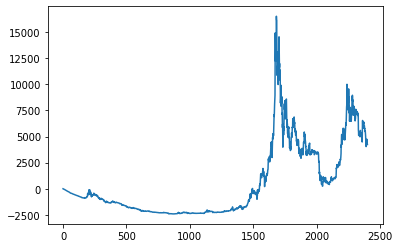

In [ ]:
import matplotlib.pyplot as plt
df1.plot.line()

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

0         -4.292589
1        -12.354187
2        -14.385909
3        -23.309895
4        -30.198339
           ...     
2397    4556.512887
2398    4411.148513
2399    4308.824197
2400    4306.959937
2401    4238.815735
Name: close, Length: 2402, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1_new=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1_new)

[[0.12735234]
 [0.12692685]
 [0.12681962]
 ...
 [0.35499697]
 [0.35489858]
 [0.35130195]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1_new)*0.65)
test_size=len(df1_new)-training_size
train_data,test_data=df1_new[0:training_size,:],df1_new[training_size:len(df1_new),:1]

In [ ]:
training_size,test_size

(1561, 841)

In [ ]:
train_data

array([[0.12735234],
       [0.12692685],
       [0.12681962],
       ...,
       [0.18692229],
       [0.20020665],
       [0.19263939]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1460, 100)
(1460,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(740, 100)
(740,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

###Stacked LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
#model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


### Simple LSTM Model

In [ ]:
#define model
# model = Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

In [ ]:
#model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 47ms/step - loss: 4.2338e-04 - val_loss: 0.0041
Epoch 2/100
23/23 [==============================] - 0s 13ms/step - loss: 3.8971e-05 - val_loss: 0.0037
Epoch 3/100
23/23 [==============================] - 0s 13ms/step - loss: 2.9119e-05 - val_loss: 0.0035
Epoch 4/100
23/23 [==============================] - 0s 13ms/step - loss: 2.7919e-05 - val_loss: 0.0034
Epoch 5/100
23/23 [==============================] - 0s 13ms/step - loss: 2.7089e-05 - val_loss: 0.0032
Epoch 6/100
23/23 [==============================] - 0s 13ms/step - loss: 2.6156e-05 - val_loss: 0.0033
Epoch 7/100
23/23 [==============================] - 0s 13ms/step - loss: 2.4364e-05 - val_loss: 0.0025
Epoch 8/100
23/23 [==============================] - 0s 13ms/step - loss: 2.4135e-05 - val_loss: 0.0024
Epoch 9/100
23/23 [==============================] - 0s 13ms/step - loss: 2.5473e-05 - val_loss: 0.0024
Epoch 10/100
23/23 [==============================] - 0s 12ms/st

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
#n,m=y_train.shape[0],ytest.shape[0]
#y_train=y_train.reshape(n,1)
#y_test=ytest.reshape(m,1)

In [ ]:
##Transformback to original form
train_pred=scaler.inverse_transform(train_predict)
test_pred=scaler.inverse_transform(test_predict)
#y_train_act=scaler.inverse_transform(y_train)
#y_test_act=scaler.inverse_transform(y_test)
test_pred.shape

(740, 1)

In [ ]:
file_path = '/content/drive/MyDrive/CS725_Project/arima_pred.csv'
df_arima_pred=pd.read_csv(file_path)
df_arima_pred=df.reset_index()['close']
df_arima_pred=np.array(df_arima_pred)

In [ ]:
n=int(len(df_arima_pred)*0.65)
arima_train=df_arima_pred[101:n]
arima_test=df_arima_pred[(n+101):]
x,y=arima_train.shape[0],arima_test.shape[0]
arima_train,arima_test=arima_train.reshape(x,1),arima_test.reshape(y,1)
Final_pred_train=arima_train+train_pred
Final_pred_test=arima_test+test_pred
Final_pred_train_L,Final_pred_test_L=[],[]
for i in range(len(Final_pred_train)):
  Final_pred_train_L.append(Final_pred_train[i][0])
for i in range(len(Final_pred_test)):
  Final_pred_test_L.append(Final_pred_test[i][0])

Final_pred_train_a,Final_pred_test_a=np.array(Final_pred_train_L),np.array(Final_pred_test_L)
#[0]

In [ ]:
file_path = '/content/drive/MyDrive/CS725_Project/consolidated_coin_data.csv'
timeseries_data_df=pd.read_csv(file_path)
is_bitcoin = timeseries_data_df['Currency'] == 'bitcoin'
df = timeseries_data_df[is_bitcoin].iloc[::-1]
df1_act=df.reset_index()['Close']
df1_act = df1_act.str.replace(',', '')
df1_act = pd.to_numeric(df1_act)
df1_train=df1_act[111:n+10]
df1_test=df1_act[(n+111):]


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
def MAPE(y_true,y_pred):
  mape=np.mean(np.abs(y_true-y_pred)/y_true)*100
  return mape

print('RMSE_Train=','%0.3f'%math.sqrt(mean_squared_error(df1_train,Final_pred_train)))
print('RMSE_Test=','%0.3f'%math.sqrt(mean_squared_error(df1_test,Final_pred_test)))
print('----------------------')
print('MAE_Train=','%0.3f'%mean_absolute_error(df1_train,Final_pred_train))
print('MAE_Test=','%0.3f'%mean_absolute_error(df1_test,Final_pred_test))
print('----------------------')
print('MAPE_Train=','%0.3f'%MAPE(df1_train,Final_pred_train_a),'%')
print('MAPE_Test=','%0.3f'%MAPE(df1_test,Final_pred_test_a),'%')
print('----------------------')

RMSE_Train= 4252.013
RMSE_Test= 4118.681
----------------------
MAE_Train= 4099.678
MAE_Test= 3108.138
----------------------
MAPE_Train= 996.629 %
MAPE_Test= 37.218 %
----------------------
